In [34]:
from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
import numpy as np
from scipy.stats import shapiro

from eff.analysis import mann_whitney_test, wilcoxon_signed_rank_test, get_significance_level
from eff.util.util import load_results

np.random.seed(0)

base_path = Path("./out/nelex_unique")
dataset, res, criterion, model = load_results(base_path, 'fin')

surprisal_diff_order = {}
surprisal_diff_dist = {}
surprisal_dist = {}

### VH Languagess

Finnish -> Hungarian -> Turkish -> Manchu -> Khalkha Mongoliab

In [35]:
# harmonic groups
front_vowels = ['æ', 'œ', 'ʏ', 'y']
back_vowels = ['ɔ', 'u', 'ʊ', 'ɑ']
neutral_vowels = ['i', 'ɛ']

# model probe front harmony (feature surprisal)
clts_ds = dataset['clts']
bipa = clts_ds.bipa
output_alphabet = clts_ds.output_alphabet



logprobs = res['unmasked']['logprobs']
targets = res['unmasked']['targets']
target_indices = res['unmasked']['indices']

front_indices = [output_alphabet.char2idx(v) for v in front_vowels]
back_indices = [output_alphabet.char2idx(v) for v in back_vowels]
neutral_indices = [output_alphabet.char2idx(v) for v in neutral_vowels]


ff_surprisal = []
fb_surprisal = []
bb_surprisal = []
bf_surprisal = []


for indices_word, targets_word, logprobs_word in zip(target_indices, targets, logprobs):
    vowel_indices = [targets_word[idx] for idx in indices_word]
    if len(vowel_indices) >= 2:
        for i in range(len(vowel_indices)-1, 0, -1):
            i1, i2 = vowel_indices[i-1], vowel_indices[i]
            # need char to determine harmonic group
            v1, v2 = output_alphabet.idx2char(i1), output_alphabet.idx2char(i2)
            target_idx = indices_word[i]

            if not clts_ds.bipa[v1].type == 'diphthong' \
            and not clts_ds.bipa[v2].type == 'diphthong':

                # front
                if v1 in front_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    ff_surprisal.append(harmonic_surprisal)
                    fb_surprisal.append(disharmonic_surprisal)
                # back
                elif v2 in back_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    bb_surprisal.append(harmonic_surprisal)
                    bf_surprisal.append(disharmonic_surprisal)

f_diff = np.array(fb_surprisal) - np.array(ff_surprisal)
b_diff = np.array(bf_surprisal) - np.array(bb_surprisal)
mean_diff_f = np.mean(f_diff)
mean_diff_b = np.mean(b_diff)
print(mean_diff_f)
print(mean_diff_b)

surprisal_diff_order['fin_front'] = mean_diff_f
surprisal_diff_order['fin_back'] = mean_diff_b
surprisal_diff_dist['fin_front'] = f_diff
surprisal_diff_dist['fin_back'] = b_diff
surprisal_dist['fin_front_h'] = ff_surprisal
surprisal_dist['fin_front_dish'] = fb_surprisal
surprisal_dist['fin_back_h'] = bb_surprisal
surprisal_dist['fin_back_dish'] = bf_surprisal


0.8296672697307539
0.6094320622816207


In [36]:
dataset, res, criterion, model = load_results(base_path, 'hun')
# harmonic groups. if neutral vowels are grouped with front vowels, they need to be exlcuded when
# calculating feature surprisal after +BACK vowels, since they are still neutral in that condition.
front_vowels = ['ø', 'y']
back_vowels = ['o', 'u', 'ɒ', 'a']
neutral_vowels = ['i', 'ɛ', 'e']

ff_surprisal = []
fb_surprisal = []
bb_surprisal = []
bf_surprisal = []

for indices_word, targets_word, logprobs_word in zip(target_indices, targets, logprobs):
    vowel_indices = [targets_word[idx] for idx in indices_word]
    if len(vowel_indices) >= 2:
        for i in range(len(vowel_indices)-1, 0, -1):
            i1, i2 = vowel_indices[i-1], vowel_indices[i]
            # need char to determine harmonic group
            v1, v2 = output_alphabet.idx2char(i1), output_alphabet.idx2char(i2)
            target_idx = indices_word[i]

            if not clts_ds.bipa[v1].type == 'diphthong' \
            and not clts_ds.bipa[v2].type == 'diphthong':

                # front
                if v1 in front_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    ff_surprisal.append(harmonic_surprisal)
                    fb_surprisal.append(disharmonic_surprisal)

                # back
                elif v2 in back_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    bb_surprisal.append(harmonic_surprisal)
                    bf_surprisal.append(disharmonic_surprisal)

f_diff = np.array(fb_surprisal) - np.array(ff_surprisal)
b_diff = np.array(bf_surprisal) - np.array(bb_surprisal)
mean_diff_f = np.mean(f_diff)
mean_diff_b = np.mean(b_diff)
print(mean_diff_f)
print(mean_diff_b)

surprisal_diff_order['hun_front'] = mean_diff_f
surprisal_diff_order['hun_back'] = mean_diff_b
surprisal_diff_dist['hun_front'] = f_diff
surprisal_diff_dist['hun_back'] = b_diff
surprisal_dist['hun_front_h'] = ff_surprisal
surprisal_dist['hun_front_dish'] = fb_surprisal
surprisal_dist['hun_back_h'] = bb_surprisal
surprisal_dist['hun_back_dish'] = bf_surprisal

0.6597309508205689
0.7698193413840937


In [37]:
dataset, res, criterion, model = load_results(base_path, 'tur')
# harmonic groups
clts_ds = dataset['clts']
bipa = clts_ds.bipa
output_alphabet = clts_ds.output_alphabet
logprobs = res['unmasked']['logprobs']
targets = res['unmasked']['targets']
target_indices = res['unmasked']['indices']

front_vowels = ['œ', 'i', 'ɛ', 'y']
back_vowels = ['o', 'u', 'a', 'ɯ']
rounded_vowels = ['o', 'œ', 'y', 'u']
unrounded_vowels = ['i', 'ɛ', 'a', 'ɯ']

front_indices = [output_alphabet.char2idx(v) for v in front_vowels]
back_indices = [output_alphabet.char2idx(v) for v in back_vowels]

ff_surprisal = []
bb_surprisal = []
fb_surprisal = []
bf_surprisal = []


for indices_word, targets_word, logprobs_word in zip(target_indices, targets, logprobs):
    vowel_indices = [targets_word[idx] for idx in indices_word]
    if len(vowel_indices) >= 2:
        for i in range(len(vowel_indices)-1, 0, -1):
            idx = vowel_indices[i]
            prev_idx = vowel_indices[i-1]
            target_idx = indices_word[i] # first index of the logprobs
            # need char to determine harmonic group
            vowel = output_alphabet.idx2char(idx)
            prev_vowel = output_alphabet.idx2char(prev_idx)

            if not clts_ds.bipa[vowel].type == 'diphthong' \
            and not clts_ds.bipa[vowel].type == 'diphthong':

                if prev_vowel in front_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    ff_surprisal.append(harmonic_surprisal)
                    fb_surprisal.append(disharmonic_surprisal)
                elif prev_vowel in back_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    bb_surprisal.append(harmonic_surprisal)
                    bf_surprisal.append(disharmonic_surprisal)

f_diff = np.array(fb_surprisal) - np.array(ff_surprisal)
b_diff = np.array(bf_surprisal) - np.array(bb_surprisal)
mean_diff_f = np.mean(f_diff)
mean_diff_b = np.mean(b_diff)
print(mean_diff_f)
print(mean_diff_b)

surprisal_diff_order['tur_front'] = mean_diff_f
surprisal_diff_order['tur_back'] = mean_diff_b
surprisal_diff_dist['tur_front'] = f_diff
surprisal_diff_dist['tur_back'] = b_diff
surprisal_dist['tur_front_h'] = ff_surprisal
surprisal_dist['tur_front_dish'] = fb_surprisal
surprisal_dist['tur_back_h'] = bb_surprisal
surprisal_dist['tur_back_dish'] = bf_surprisal


rr_surprisal = []
uu_surprisal = []
ur_surprisal = []
ru_surprisal = []

rounded_indices = [output_alphabet.char2idx(v) for v in rounded_vowels]
unrounded_indices = [output_alphabet.char2idx(v) for v in unrounded_vowels]


for indices_word, targets_word, logprobs_word in zip(target_indices, targets, logprobs):
    vowel_indices = [targets_word[idx] for idx in indices_word]
    if len(vowel_indices) >= 2:
        for i in range(len(vowel_indices)-1, 0, -1):
            idx = vowel_indices[i]
            prev_idx = vowel_indices[i-1]
            target_idx = indices_word[i] # first index of the logprobs
            # need char to determine harmonic group
            vowel = output_alphabet.idx2char(idx)
            prev_vowel = output_alphabet.idx2char(prev_idx)

            if not clts_ds.bipa[vowel].type == 'diphthong' \
            and not clts_ds.bipa[vowel].type == 'diphthong':

                if prev_vowel in rounded_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in rounded_indices])
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in unrounded_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    rr_surprisal.append(harmonic_surprisal)
                    ru_surprisal.append(disharmonic_surprisal)
                elif prev_vowel in unrounded_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in unrounded_indices])
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in rounded_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    uu_surprisal.append(harmonic_surprisal)
                    ur_surprisal.append(disharmonic_surprisal)

r_diff = np.array(ru_surprisal) - np.array(rr_surprisal)
ur_diff = np.array(ur_surprisal) - np.array(uu_surprisal)
mean_diff_r = np.mean(r_diff)
mean_diff_ur = np.mean(ur_diff)
print(mean_diff_r)
print(mean_diff_ur)

surprisal_diff_order['tur_round'] = mean_diff_r
surprisal_diff_order['tur_unround'] = mean_diff_ur
surprisal_diff_dist['tur_round'] = r_diff
surprisal_diff_dist['tur_unround'] = ur_diff

3.1501749663321577
4.072919907147766
1.0515745393766904
3.1849920087842083


In [38]:
dataset, res, criterion, model = load_results(base_path, 'mnc')
front_vowels = ['ɤ']
back_vowels = ['a', 'ɔ', 'ʊ']
neutral_vowels = ['i', 'u']

clts_ds = dataset['clts']
bipa = clts_ds.bipa
output_alphabet = clts_ds.output_alphabet
logprobs = res['unmasked']['logprobs']
targets = res['unmasked']['targets']
target_indices = res['unmasked']['indices']

front_indices = [output_alphabet.char2idx(v) for v in front_vowels]
back_indices = [output_alphabet.char2idx(v) for v in back_vowels]
neutral_indices = [output_alphabet.char2idx(v) for v in neutral_vowels]

ff_surprisal = []
fb_surprisal = []
bb_surprisal = []
bf_surprisal = []

for indices_word, targets_word, logprobs_word in zip(target_indices, targets, logprobs):
    vowel_indices = [targets_word[idx] for idx in indices_word]
    if len(vowel_indices) >= 2:
        for i in range(len(vowel_indices)-1, 0, -1):
            i1, i2 = vowel_indices[i-1], vowel_indices[i]
            # need char to determine harmonic group
            v1, v2 = output_alphabet.idx2char(i1), output_alphabet.idx2char(i2)
            target_idx = indices_word[i]

            if not clts_ds.bipa[v1].type == 'diphthong' \
            and not clts_ds.bipa[v2].type == 'diphthong':

                # front
                if v1 in front_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    ff_surprisal.append(harmonic_surprisal)
                    fb_surprisal.append(disharmonic_surprisal)
                # back
                elif v2 in back_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    bb_surprisal.append(harmonic_surprisal)
                    bf_surprisal.append(disharmonic_surprisal)

f_diff = np.array(fb_surprisal) - np.array(ff_surprisal)
b_diff = np.array(bf_surprisal) - np.array(bb_surprisal)
mean_diff_f = np.mean(f_diff)
mean_diff_b = np.mean(b_diff)
print(mean_diff_f)
print(mean_diff_b)

surprisal_diff_order['mnc_front'] = mean_diff_f
surprisal_diff_order['mnc_back'] = mean_diff_b
surprisal_diff_dist['mnc_front'] = f_diff
surprisal_diff_dist['mnc_back'] = b_diff
surprisal_dist['mnc_front_h'] = ff_surprisal
surprisal_dist['mnc_front_dish'] = fb_surprisal
surprisal_dist['mnc_back_h'] = bb_surprisal
surprisal_dist['mnc_back_dish'] = bf_surprisal

2.5563143455383885
2.5436666507529724


In [39]:
dataset, res, criterion, model = load_results(base_path, 'khk')

# harmonic groups
front_vowels = ['e', 'u', 'o'] # +ATR
back_vowels = ['a', 'ʊ', 'ɔ'] # -ATR
neutral_vowels = ['i']

clts_ds = dataset['clts']
bipa = clts_ds.bipa
output_alphabet = clts_ds.output_alphabet
logprobs = res['unmasked']['logprobs']
targets = res['unmasked']['targets']
target_indices = res['unmasked']['indices']

front_indices = [output_alphabet.char2idx(v) for v in front_vowels]
back_indices = [output_alphabet.char2idx(v) for v in back_vowels]
neutral_indices = [output_alphabet.char2idx(v) for v in neutral_vowels]


ff_surprisal = []
fb_surprisal = []
bb_surprisal = []
bf_surprisal = []


for indices_word, targets_word, logprobs_word in zip(target_indices, targets, logprobs):
    vowel_indices = [targets_word[idx] for idx in indices_word]
    if len(vowel_indices) >= 2:
        for i in range(len(vowel_indices)-1, 0, -1):
            i1, i2 = vowel_indices[i-1], vowel_indices[i]
            # need char to determine harmonic group
            v1, v2 = output_alphabet.idx2char(i1), output_alphabet.idx2char(i2)
            target_idx = indices_word[i]

            if not clts_ds.bipa[v1].type == 'diphthong' \
            and not clts_ds.bipa[v2].type == 'diphthong':

                # front
                if v1 in front_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    ff_surprisal.append(harmonic_surprisal)
                    fb_surprisal.append(disharmonic_surprisal)
                # back
                elif v2 in back_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    bb_surprisal.append(harmonic_surprisal)
                    bf_surprisal.append(disharmonic_surprisal)

f_diff = np.array(fb_surprisal) - np.array(ff_surprisal)
b_diff = np.array(bf_surprisal) - np.array(bb_surprisal)
mean_diff_f = np.mean(f_diff)
mean_diff_b = np.mean(b_diff)
print(mean_diff_f)
print(mean_diff_b)

surprisal_diff_order['khk_atr'] = mean_diff_f
surprisal_diff_order['khk_natr'] = mean_diff_b
surprisal_diff_dist['khk_atr'] = f_diff
surprisal_diff_dist['khk_natr'] = b_diff
surprisal_dist['khk_atr_h'] = ff_surprisal
surprisal_dist['khk_atr_dish'] = fb_surprisal
surprisal_dist['khk_natr_h'] = bb_surprisal
surprisal_dist['khk_natr_dish'] = bf_surprisal


# model probe rounded harmony (feature surprisal)
unrounded_vowels = ['e', 'a', 'i']
rounded_vowels = ['o', 'ɔ']
neutral_vowels = ['u', 'ʊ', 'ɵ']

rounded_indices = [output_alphabet.char2idx(v) for v in front_vowels]
unrounded_indices = [output_alphabet.char2idx(v) for v in back_vowels]

rr_surprisal = []
uu_surprisal = []
ur_surprisal = []
ru_surprisal = []
nr_surprisal = []
nu_surprisal = []

rounded_indices = [output_alphabet.char2idx(v) for v in rounded_vowels]
unrounded_indices = [output_alphabet.char2idx(v) for v in unrounded_vowels]
neutral_indices = [output_alphabet.char2idx(v) for v in neutral_vowels]


for indices_word, targets_word, logprobs_word in zip(target_indices, targets, logprobs):
    vowel_indices = [targets_word[idx] for idx in indices_word]
    if len(vowel_indices) >= 2:
        for i in range(len(vowel_indices)-1, 0, -1):
            i1, i2 = vowel_indices[i-1], vowel_indices[i]
            target_idx = indices_word[i] # first index of the logprobs
            # need char to determine harmonic group
            v1, v2 = output_alphabet.idx2char(i1), output_alphabet.idx2char(i2)

            if not clts_ds.bipa[v1].type == 'diphthong' \
            and not clts_ds.bipa[v2].type == 'diphthong' \
            and v1 in back_vowels and v2 in back_vowels: # +atr harmony needs to apply for +-round harmony to operate 

                # round
                if v1 in rounded_vowels :
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in rounded_indices + neutral_indices])
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in unrounded_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    rr_surprisal.append(harmonic_surprisal)
                    ru_surprisal.append(disharmonic_surprisal)
                elif v1 in unrounded_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in unrounded_indices])
                    # also look for neutral indices since they _do_ belong to the +ROUND group
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in rounded_indices + neutral_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    uu_surprisal.append(harmonic_surprisal)
                    ur_surprisal.append(disharmonic_surprisal)

r_diff = np.array(ru_surprisal) - np.array(rr_surprisal)
ur_diff = np.array(ur_surprisal) - np.array(uu_surprisal)
mean_diff_r = np.mean(r_diff)
mean_diff_ur = np.mean(ur_diff)
print(mean_diff_r)
print(mean_diff_ur)

surprisal_diff_order['khk_round'] = mean_diff_r
surprisal_diff_order['khk_unround'] = mean_diff_ur
surprisal_diff_dist['khk_round'] = r_diff
surprisal_diff_dist['khk_unround'] = ur_diff

1.8211014946613264
0.6659631724984446
0.8522939153444687
0.7946821782776512


### Non-VH Languages

In [40]:
non_vh_langs =  ['arb', 'ain', 'ekk', 'hye', 'eus']

id2name = dict(
    fin="Finnish", arb="Arabic", 
    tur="Turkish", ain="Ainu", 
    mnc="Manchu", ekk="Estonian", 
    hun="Hungarian", hye="Armenian", 
    khk="Khalkha Mongolian", eus="Basque"
)

In [41]:
for lang_id in non_vh_langs:
    # load results
    dataset, res, criterion, model = load_results(base_path, lang_id)
    clts_ds = dataset['clts']
    bipa = clts_ds.bipa
    output_alphabet = clts_ds.output_alphabet
    logprobs = res['unmasked']['logprobs']
    targets = res['unmasked']['targets']
    target_indices = res['unmasked']['indices']

    # model probe front harmony 
    front_vowels = [v for v in output_alphabet.symbols if bipa[v].type == 'vowel' and 'front' in bipa[v].featureset] 
    back_vowels = [v for v in output_alphabet.symbols if bipa[v].type == 'vowel' and 'back' in bipa[v].featureset] 

    front_indices = [output_alphabet.char2idx(v) for v in front_vowels]
    back_indices = [output_alphabet.char2idx(v) for v in back_vowels]

    ff_surprisal = []
    bb_surprisal = []
    fb_surprisal = []
    bf_surprisal = []
    
    for indices_word, targets_word, logprobs_word in zip(target_indices, targets, logprobs):
        vowel_indices = [targets_word[idx] for idx in indices_word]
        if len(vowel_indices) >= 2:
            for i in range(len(vowel_indices)-1, 0, -1):
                idx = vowel_indices[i]
                prev_idx = vowel_indices[i-1]
                target_idx = indices_word[i] # first index of the logprobs
                # need char to determine harmonic group
                vowel = output_alphabet.idx2char(idx)
                prev_vowel = output_alphabet.idx2char(prev_idx)

                fset1 = clts_ds.bipa[vowel].featureset
                fset2 = clts_ds.bipa[prev_vowel].featureset

                if not clts_ds.bipa[vowel].type == 'diphthong' \
                and not clts_ds.bipa[vowel].type == 'diphthong':

                    if prev_vowel in front_vowels:
                        target_logprobs = logprobs_word[target_idx]
                        harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                        disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                        harmonic_surprisal = -np.log2(harmonic_surprisal)
                        disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                        ff_surprisal.append(harmonic_surprisal)
                        fb_surprisal.append(disharmonic_surprisal)
                    elif prev_vowel in back_vowels:
                        target_logprobs = logprobs_word[target_idx]
                        harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                        disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                        harmonic_surprisal = -np.log2(harmonic_surprisal)
                        disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                        bb_surprisal.append(harmonic_surprisal)
                        bf_surprisal.append(disharmonic_surprisal)

    f_diff = np.array(fb_surprisal) - np.array(ff_surprisal)
    b_diff = np.array(bf_surprisal) - np.array(bb_surprisal)
    mean_diff_f = np.mean(f_diff)
    mean_diff_b = np.mean(b_diff)
    print(mean_diff_f)
    print(mean_diff_b)

    surprisal_diff_order['{}_front'.format(lang_id)] = mean_diff_f
    surprisal_diff_order['{}_back'.format(lang_id)] = mean_diff_b
    surprisal_diff_dist['{}_front'.format(lang_id)] = f_diff
    surprisal_diff_dist['{}_back'.format(lang_id)] = b_diff

    rr_surprisal = []
    uu_surprisal = []
    ur_surprisal = []
    ru_surprisal = []

    # model probe roundedness harmony (feature surprisal)
    rounded_vowels = [v for v in output_alphabet.symbols if bipa[v].type == 'vowel' and 'rounded' in bipa[v].featureset] 
    unrounded_vowels = [v for v in output_alphabet.symbols if bipa[v].type == 'vowel' and 'unrounded' in bipa[v].featureset] 

    rounded_indices = [output_alphabet.char2idx(v) for v in front_vowels]
    unrounded_indices = [output_alphabet.char2idx(v) for v in back_vowels]



    for indices_word, targets_word, logprobs_word in zip(target_indices, targets, logprobs):
        vowel_indices = [targets_word[idx] for idx in indices_word]
        if len(vowel_indices) >= 2:
            for i in range(len(vowel_indices)-1, 0, -1):
                idx = vowel_indices[i]
                prev_idx = vowel_indices[i-1]
                target_idx = indices_word[i] # first index of the logprobs
                # need char to determine harmonic group
                vowel = output_alphabet.idx2char(idx)
                prev_vowel = output_alphabet.idx2char(prev_idx)

                if not clts_ds.bipa[vowel].type == 'diphthong' \
                and not clts_ds.bipa[vowel].type == 'diphthong':

                    if prev_vowel in rounded_vowels:
                        target_logprobs = logprobs_word[target_idx]
                        harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in rounded_indices])
                        disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in unrounded_indices])
                        harmonic_surprisal = -np.log2(harmonic_surprisal)
                        disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                        rr_surprisal.append(harmonic_surprisal)
                        ru_surprisal.append(disharmonic_surprisal)
                    elif prev_vowel in unrounded_vowels:
                        target_logprobs = logprobs_word[target_idx]
                        harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in unrounded_indices])
                        disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in rounded_indices])
                        harmonic_surprisal = -np.log2(harmonic_surprisal)
                        disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                        uu_surprisal.append(harmonic_surprisal)
                        ur_surprisal.append(disharmonic_surprisal)

    r_diff = np.array(ru_surprisal) - np.array(rr_surprisal)
    ur_diff = np.array(ur_surprisal) - np.array(uu_surprisal)
    mean_diff_r = np.mean(r_diff)
    mean_diff_ur = np.mean(ur_diff)
    print(mean_diff_f)
    print(mean_diff_b)

    surprisal_diff_order['{}_round'.format(lang_id)] = mean_diff_r
    surprisal_diff_order['{}_unround'.format(lang_id)] = mean_diff_ur
    surprisal_diff_dist['{}_round'.format(lang_id)] = r_diff
    surprisal_diff_dist['{}_unround'.format(lang_id)] = ur_diff

0.6583702939083095
-0.15584861362372907
0.6583702939083095
-0.15584861362372907
0.6739541490334403
-0.738781164061038
0.6739541490334403
-0.738781164061038
0.021478675252812496
0.1643707350669536
0.021478675252812496
0.1643707350669536
0.037360434978592434
0.4028317371147912
0.037360434978592434
0.4028317371147912
0.26501849803765176
-0.28172813650516876
0.26501849803765176
-0.28172813650516876


### Plotting

In [53]:
print(surprisal_diff_order.keys())

group2color = {
    'fin_front': 'indianred', 
    'fin_back': 'indianred', 
    'hun_front': 'slateblue', 
    'hun_back': 'slateblue', 
    'tur_front': 'cyan', 
    'tur_back': 'cyan', 
    'tur_round': 'cyan', 
    'tur_unround': 'cyan', 
    'mnc_front': 'goldenrod', 
    'mnc_back': 'goldenrod', 
    'khk_atr': 'plum', 
    'khk_natr': 'plum', 
    'khk_round': 'plum', 
    'khk_unround': 'plum', 
    'arb_front': 'grey', 
    'arb_back': 'grey', 
    'arb_round': 'grey', 
    'arb_unround': 'grey', 
    'ain_front': 'grey', 
    'ain_back': 'grey', 
    'ain_round': 'grey', 
    'ain_unround': 'grey', 
    'ekk_front': 'grey', 
    'ekk_back': 'grey', 
    'ekk_round': 'grey', 
    'ekk_unround': 'grey', 
    'hye_front': 'grey', 
    'hye_back': 'grey', 
    'hye_round': 'grey', 
    'hye_unround': 'grey', 
    'eus_front': 'grey', 
    'eus_back': 'grey', 
    'eus_round': 'grey', 
    'eus_unround': 'grey'
}

lang2color = {
    'Finnish':  'indianred', 
    'Hungarian': 'slateblue', 
    'Turkish': 'cyan', 
    'Manchu': 'goldenrod', 
    'Khalkha Mongolian': 'plum', 
    'Non-VH language': 'grey', 
}

dict_keys(['fin_front', 'fin_back', 'hun_front', 'hun_back', 'tur_front', 'tur_back', 'tur_round', 'tur_unround', 'mnc_front', 'mnc_back', 'khk_atr', 'khk_natr', 'khk_round', 'khk_unround', 'arb_front', 'arb_back', 'arb_round', 'arb_unround', 'ain_front', 'ain_back', 'ain_round', 'ain_unround', 'ekk_front', 'ekk_back', 'ekk_round', 'ekk_unround', 'hye_front', 'hye_back', 'hye_round', 'hye_unround', 'eus_front', 'eus_back', 'eus_round', 'eus_unround'])


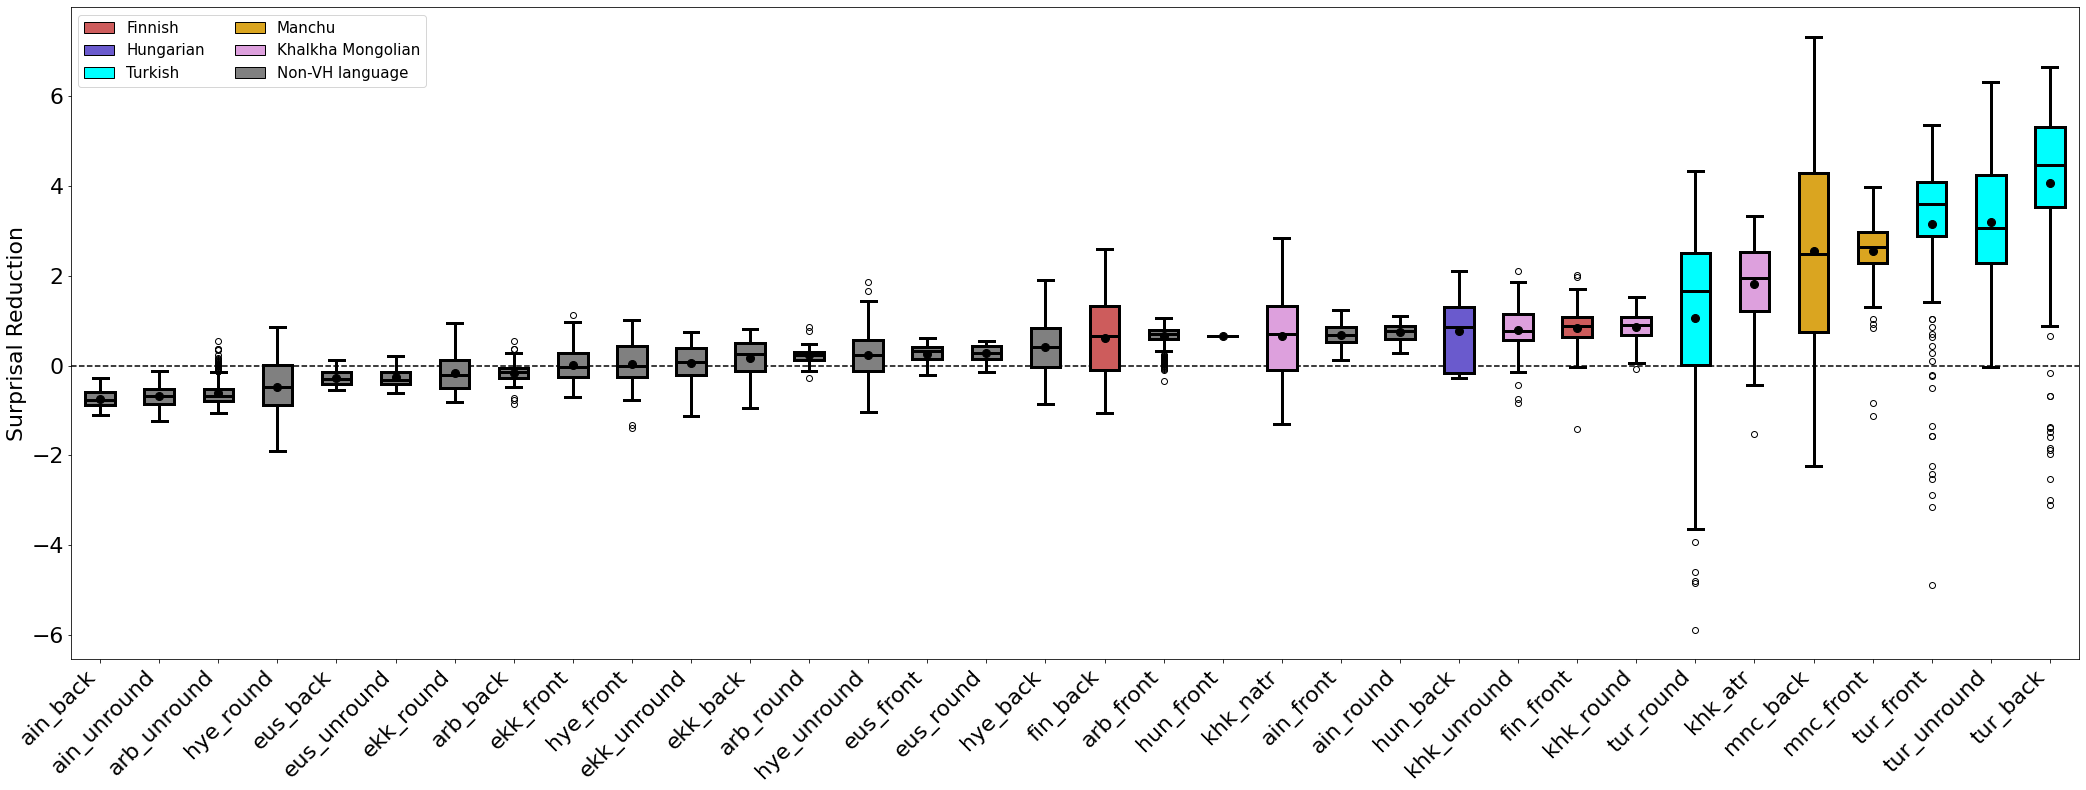

In [55]:
#ordering 
logodds_order = dict(sorted(surprisal_diff_order.items(), key=lambda item: item[1]))

fontsize=22

fig = plt.figure(figsize=(36, 12))
gs = fig.add_gridspec(1, 1, hspace=0.15, wspace=0.25)
ax = gs.subplots()

plt.axhline(y = 0.0, color = 'black', linestyle = '--')

legend_elements = []
for group, color in lang2color.items():
    if color != 'grey':
        elem = Patch(facecolor=color, edgecolor='black', label=group)
        legend_elements.append(elem)
legend_elements.append(Patch(facecolor='grey', edgecolor='black', \
    label="Non-VH language"))

xlabels = list(logodds_order.keys())

data = [surprisal_diff_dist[group] for group in logodds_order]


assert len(data) == len(xlabels) # suprisal distributions and number of conditions have to be identical.
bp = ax.boxplot(data, patch_artist=True, showmeans=True)
for element in ['boxes', 'whiskers', 'fliers', 'caps']:
    plt.setp(bp[element], color='black', linewidth=3)
for box, hg in zip(bp['boxes'], xlabels):
    box.set(facecolor=group2color[hg])
plt.setp(bp['medians'], linestyle='-', linewidth=3, color='black')
plt.setp(bp['means'], linestyle='-', marker='o', markerfacecolor='black', markeredgecolor='black',
    markersize=8)
ax.set_ylabel("Surprisal Reduction", fontsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)
ax.set_xticklabels(xlabels, fontsize=fontsize, rotation=45, ha='right')
ax.set_title("", fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.legend(handles=legend_elements, loc='best', ncol=2, fontsize=15)

plt.savefig("../img/surprisal_reduction.png",
            bbox_inches='tight',
            pad_inches=0,
            format='png',
            dpi=300)

### Correlation with harmonic group size

-0.1339257838493064 0.7122356529128431


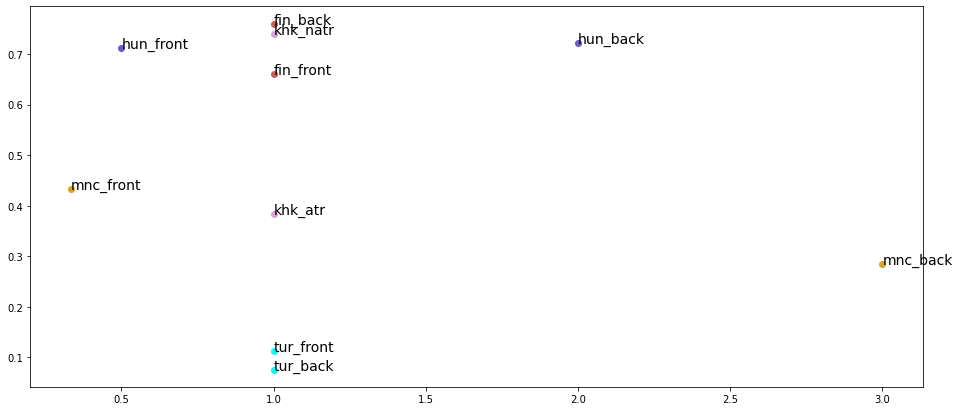

In [44]:
group_ratios = []
diff_ratios = []
labels = []

# Finnish
front_vowels = ['æ', 'œ', 'ʏ', 'y']
back_vowels = ['ɔ', 'u', 'ʊ', 'ɑ']
neutral_vowels = ['i', 'ɛ']

r_g_f_fin = len(front_vowels)/len(back_vowels)
r_g_b_fin = len(back_vowels)/len(front_vowels)
r_d_f_fin = np.mean(surprisal_dist['fin_front_h'])/np.mean(surprisal_dist['fin_front_dish'])
r_d_b_fin = np.mean(surprisal_dist['fin_back_h'])/np.mean(surprisal_dist['fin_back_dish'])

group_ratios += [
    r_g_f_fin, 
    r_g_b_fin
    ]
diff_ratios += [
    r_d_f_fin,
    r_d_b_fin
]
labels += ['fin_front', 'fin_back']


# Hungarian
front_vowels = ['ø', 'y']
back_vowels = ['o', 'u', 'ɒ', 'a']
neutral_vowels = ['i', 'ɛ', 'e']

r_g_f_hun = len(front_vowels)/len(back_vowels)
r_g_b_hun = len(back_vowels)/len(front_vowels)
r_d_f_hun = np.mean(surprisal_dist['hun_front_h'])/np.mean(surprisal_dist['hun_front_dish'])
r_d_b_hun = np.mean(surprisal_dist['hun_back_h'])/np.mean(surprisal_dist['hun_back_dish'])

group_ratios += [
    r_g_f_hun, 
    r_g_b_hun
    ]
diff_ratios += [
    r_d_f_hun,
    r_d_b_hun
]
labels += ['hun_front', 'hun_back']


# Turkish
front_vowels = ['œ', 'i', 'ɛ', 'y']
back_vowels = ['o', 'u', 'a', 'ɯ']
rounded_vowels = ['o', 'œ', 'y', 'u']
unrounded_vowels = ['i', 'ɛ', 'a', 'ɯ']

r_g_f_tur = len(front_vowels)/len(back_vowels)
r_g_b_tur = len(back_vowels)/len(front_vowels)
r_d_f_tur = np.mean(surprisal_dist['tur_front_h'])/np.mean(surprisal_dist['tur_front_dish'])
r_d_b_tur = np.mean(surprisal_dist['tur_back_h'])/np.mean(surprisal_dist['tur_back_dish'])

group_ratios += [
    r_g_f_tur, 
    r_g_b_tur
    ]
diff_ratios += [
    r_d_f_tur,
    r_d_b_tur
]
labels += ['tur_front', 'tur_back']


# Manchu
front_vowels = ['ɤ']
back_vowels = ['a', 'ɔ', 'ʊ']
neutral_vowels = ['i', 'u']

r_g_f_mnc = len(front_vowels)/len(back_vowels)
r_g_b_mnc = len(back_vowels)/len(front_vowels)
r_d_f_mnc = np.mean(surprisal_dist['mnc_front_h'])/np.mean(surprisal_dist['mnc_front_dish'])
r_d_b_mnc = np.mean(surprisal_dist['mnc_back_h'])/np.mean(surprisal_dist['mnc_back_dish'])

group_ratios += [
    r_g_f_mnc, 
    r_g_b_mnc
    ]
diff_ratios += [
    r_d_f_mnc,
    r_d_b_mnc
]
labels += ['mnc_front', 'mnc_back']

# Khalkha Mongolian
front_vowels = ['e', 'u', 'o'] # +ATR
back_vowels = ['a', 'ʊ', 'ɔ'] # -ATR
neutral_vowels = ['i']

r_g_f_khk = len(front_vowels)/len(back_vowels)
r_g_b_khk = len(back_vowels)/len(front_vowels)
r_d_f_khk = np.mean(surprisal_dist['khk_atr_h'])/np.mean(surprisal_dist['khk_atr_dish'])
r_d_b_khk = np.mean(surprisal_dist['khk_natr_h'])/np.mean(surprisal_dist['khk_natr_dish'])

group_ratios += [
    r_g_f_khk, 
    r_g_b_khk
    ]
diff_ratios += [
    r_d_f_khk,
    r_d_b_khk
]
labels += ['khk_atr', 'khk_natr']


fig, ax = plt.subplots(figsize=(16, 7))

for (harmonic_group, gr, dr) in zip(labels, group_ratios, diff_ratios):
    ax.scatter(gr, dr, color=group2color[harmonic_group])
    ax.text(x=gr, y=dr, s=harmonic_group, fontsize=14)

from scipy.stats import pearsonr
r, p_value = pearsonr(group_ratios, diff_ratios)
print(r, p_value)